In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from xgboost.sklearn import XGBClassifier

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set=pd.read_csv('adult-training.csv',header=None,names=columns)
train_set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test_set = pd.read_csv('adult-test.csv',skiprows=1,header=None,names=columns)
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
train_set.info()            #analyze the data
                            #We get all of the information which we are looking like data type, count of null, row count, etc.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [6]:
train_set.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

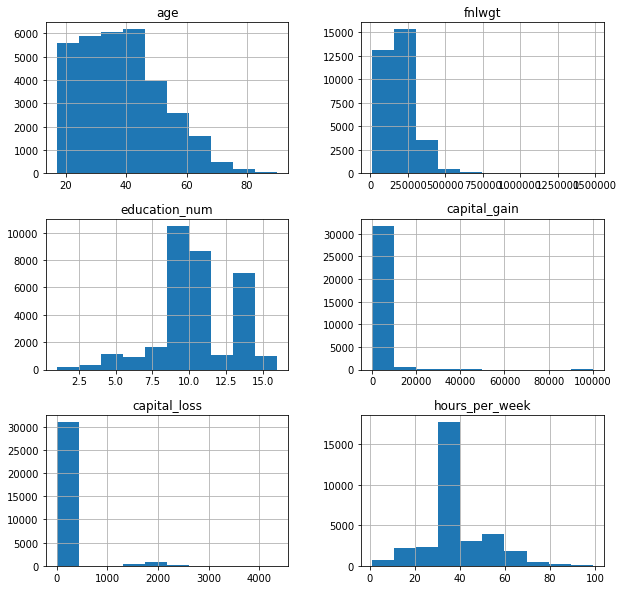

In [7]:
train_set.hist(figsize=(10,10))
plt.show()

In [8]:
train_set.isin(['?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [9]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
train_set.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [12]:
x_train=train_set.copy()
x_test=test_set.copy()

In [13]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
dict_sex={}
count=0
for i in x_train.sex.unique():
    dict_sex[i]=count
    count+=1

In [16]:
dict_workclass={}
count=0
for i in x_train.workclass.unique():
    dict_workclass[i]=count
    count+=1

In [17]:
dict_education={}
count=0
for i in x_train.education.unique():
    dict_education[i]=count
    count+=1

In [18]:
dict_marital_status={}
count=0
for i in x_train.marital_status.unique():
    dict_marital_status[i]=count
    count+=1
    
dict_occupation={}
count=0
for i in x_train.occupation.unique():
    dict_occupation[i]=count
    count+=1
    
dict_relationship={}
count=0
for i in x_train.relationship.unique():
    dict_relationship[i]=count
    count+=1
    
dict_race={}
count=0
for i in x_train.race.unique():
    dict_race[i]=count
    count+=1
    
dict_native_country={}
count=0
for i in x_train.native_country.unique():
    dict_native_country[i]=count
    count+=1
    
dict_wage_class={}
count=0
for i in x_train.wage_class.unique():
    dict_wage_class[i]=count
    count+=1
    


In [19]:
dict_sex,dict_workclass,dict_education,dict_marital_status,dict_occupation,dict_relationship,dict_race,dict_native_country,dict_wage_class

({' Male': 0, ' Female': 1},
 {' State-gov': 0,
  ' Self-emp-not-inc': 1,
  ' Private': 2,
  ' Federal-gov': 3,
  ' Local-gov': 4,
  ' ?': 5,
  ' Self-emp-inc': 6,
  ' Without-pay': 7,
  ' Never-worked': 8},
 {' Bachelors': 0,
  ' HS-grad': 1,
  ' 11th': 2,
  ' Masters': 3,
  ' 9th': 4,
  ' Some-college': 5,
  ' Assoc-acdm': 6,
  ' Assoc-voc': 7,
  ' 7th-8th': 8,
  ' Doctorate': 9,
  ' Prof-school': 10,
  ' 5th-6th': 11,
  ' 10th': 12,
  ' 1st-4th': 13,
  ' Preschool': 14,
  ' 12th': 15},
 {' Never-married': 0,
  ' Married-civ-spouse': 1,
  ' Divorced': 2,
  ' Married-spouse-absent': 3,
  ' Separated': 4,
  ' Married-AF-spouse': 5,
  ' Widowed': 6},
 {' Adm-clerical': 0,
  ' Exec-managerial': 1,
  ' Handlers-cleaners': 2,
  ' Prof-specialty': 3,
  ' Other-service': 4,
  ' Sales': 5,
  ' Craft-repair': 6,
  ' Transport-moving': 7,
  ' Farming-fishing': 8,
  ' Machine-op-inspct': 9,
  ' Tech-support': 10,
  ' ?': 11,
  ' Protective-serv': 12,
  ' Armed-Forces': 13,
  ' Priv-house-serv': 

In [20]:
dict_wage_class

{' <=50K': 0, ' >50K': 1}

In [21]:
x_train['sex']=x_train['sex'].map(dict_sex)
x_train['workclass']=x_train['workclass'].map(dict_workclass)
x_train['education']=x_train['education'].map(dict_education)
x_train['wage_class']=x_train['wage_class'].map(dict_wage_class)
x_train['native_country']=x_train['native_country'].map(dict_native_country)
x_train['race']=x_train['race'].map(dict_race)
x_train['occupation']=x_train['occupation'].map(dict_occupation)
x_train['marital_status']=x_train['marital_status'].map(dict_marital_status)
x_train['relationship']=x_train['relationship'].map(dict_relationship)


In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int64
 14  wage_class      32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [23]:
x_train.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.309972,1.897784e+05,3.424465,10.080679,1.083781,4.666411,1.542397,0.221707,0.330795,1077.648844,87.303830,40.437456,1.290317,0.240810
std,13.640433,1.225728,1.055500e+05,3.453582,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.783560e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.000000,2.370510e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [24]:
dict_native_country={}
count=0
for i in x_test.native_country.unique():
    dict_native_country[i]=count
    count+=1
    
dict_wage_class={}
count=0
for i in x_test.wage_class.unique():
    dict_wage_class[i]=count
    count+=1

In [25]:
x_test['sex']=x_test['sex'].map(dict_sex)
x_test['workclass']=x_test['workclass'].map(dict_workclass)
x_test['education']=x_test['education'].map(dict_education)
x_test['wage_class']=x_test['wage_class'].map(dict_wage_class)
x_test['native_country']=x_test['native_country'].map(dict_native_country)
x_test['race']=x_test['race'].map(dict_race)
x_test['occupation']=x_test['occupation'].map(dict_occupation)
x_test['marital_status']=x_test['marital_status'].map(dict_marital_status)
x_test['relationship']=x_test['relationship'].map(dict_relationship)


In [26]:
dict_wage_class

{' <=50K.': 0, ' >50K.': 1}

In [27]:
x_test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,16281.000000,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,2.315030,1.894357e+05,3.386954,10.072907,1.084270,4.731159,1.531171,0.217309,0.332965,1081.905104,87.899269,40.392236,1.219151,0.236226
std,13.849187,1.246499,1.057149e+05,3.440725,2.567545,1.269622,3.425948,1.445369,0.622232,0.471289,7583.935968,403.105286,12.479332,4.963702,0.424776
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.167360e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.778310e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.000000,2.383840e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,40.000000,1.000000


In [28]:
X_train=x_train.drop("wage_class",axis=1)
Y_train=x_train["wage_class"]

X_test=x_test.drop("wage_class",axis=1)
Y_test=x_test["wage_class"]

In [29]:
x=X_train.values
y=Y_train.values
xtest=X_test.values
ytest=Y_test.values

In [30]:
xtest

array([[    25,      2, 226802, ...,      0,     40,      0],
       [    38,      2,  89814, ...,      0,     50,      0],
       [    28,      4, 336951, ...,      0,     40,      0],
       ...,
       [    38,      2, 374983, ...,      0,     50,      0],
       [    44,      2,  83891, ...,      0,     40,      0],
       [    35,      6, 182148, ...,      0,     60,      0]], dtype=int64)

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Y_train=le.fit_transform(y)

In [32]:
Y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [33]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

params={"objective":"binary:logistic",
       "max_depth":2,
       "learning_rate": 1.0,
       "silent":1.0,
       "n_estimators":5}
params["eval_metric"]=["logloss","auc"]

In [34]:
 X_train,X_test,Y_train,Y_test=train_test_split(X_train, Y_train, test_size=.25)

In [35]:
xgb = XGBClassifier(**params).fit(X_train, Y_train)

[21:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\asus\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [36]:
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((24420, 14), (24420,), (8141, 14), (8141,))

In [37]:
xgb = XGBClassifier(**params).fit(X_train,Y_train)

[21:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [38]:
y_preds=xgb.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
preds_proba=xgb.predict_proba(xtest)
preds_proba

array([[0.99386334, 0.00613668],
       [0.6407623 , 0.35923767],
       [0.8818437 , 0.11815631],
       ...,
       [0.2813611 , 0.7186389 ],
       [0.72977173, 0.2702283 ],
       [0.1725058 , 0.8274942 ]], dtype=float32)

In [40]:
accuracy_score(Y_test, y_preds)

0.8473160545387545

In [41]:
eval_set = [(X_train,Y_train), (X_test, Y_test)]
xgb1 = XGBClassifier(**params).fit(X_train,Y_train,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[21:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.19709	validation_0-logloss:0.45667	validation_1-error:0.19826	validation_1-logloss:0.45888
[1]	validation_0-error:0.16650	validation_0-logloss:0.39428	validation_1-error:0.16583	validation_1-logloss:0.39276
[2]	validation_0-error:0.15569	validation_0-logloss:0.36363	validation_1-error:0.15625	validation_1-logloss:0.36232
[3]	validation_0-error:0.15000	validation_0-logloss:0.34328	validation_1-error:0.15281	validation_1-logloss:0.34467
[4]	validation_0-error:0.14857	validation_0-logloss:0.33141	validation_1-error:0.15268	validation_1-logloss:0.33498


In [42]:
y_pred1=xgb1.predict(X_test)

In [43]:
accuracy_score(Y_test, y_pred1)

0.8473160545387545

In [44]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = Y_train)
dtest = xgb.DMatrix(X_test, label = Y_test)

In [45]:
watchlist = [(dtrain,'train'),(dtest, 'eval')]

In [46]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'booster' : 'gbtree',
    'max_depth' : 7,
    'eval_metric' : 'auc'
}
# using bydeafault eta [default=0.3, alias: learning_rate]

num_rounds = 100  

In [47]:
model_xgb = xgb.train(params, dtrain, num_rounds, evals = watchlist, early_stopping_rounds = 15, verbose_eval = True)

[21:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.90194	eval-auc:0.89659
[1]	train-auc:0.91814	eval-auc:0.90712
[2]	train-auc:0.92552	eval-auc:0.91136
[3]	train-auc:0.93106	eval-auc:0.91309
[4]	train-auc:0.93664	eval-auc:0.91252
[5]	train-auc:0.93978	eval-auc:0.91494
[6]	train-auc:0.94193	eval-auc:0.91518
[7]	train-auc:0.94347	eval-auc:0.91459
[8]	train-auc:0.94512	eval-auc:0.91672
[9]	train-auc:0.94770	eval-auc:0.91552
[10]	train-auc:0.95058	eval-auc:0.91641
[11]	train-auc:0.95315	eval-auc:0.91565
[12]	train-auc:0.95424	eval-auc:0.91717
[13]	train-auc:0.95468	eval-auc:0.91730
[14]	train-auc:0.95709	eval-auc:0.91582
[15]	train-auc:0.95861	eva

In [48]:
features_contribution = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)

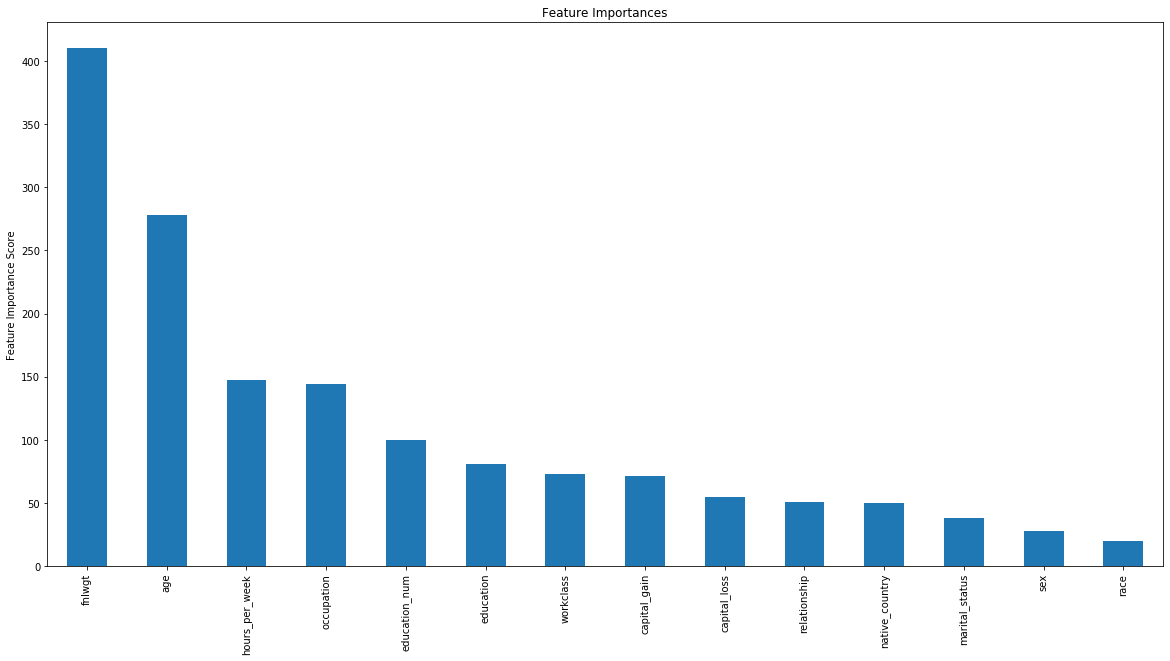

In [49]:
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
#features_contribution[:50].plot(kind='line')
plt.ylabel('Feature Importance Score')
plt.show()